<a href="https://colab.research.google.com/github/Naveenchode/cnn/blob/main/ownmodel_30epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  livelossplot

In [ ]:
import keras
from keras import layers
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from livelossplot import PlotLossesKeras
import tensorflow as tf
import pandas as pd

import random
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import cv2
import os
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image


In [ ]:

def ownmodel():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization(axis=-1))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Dropout(0.25))
    

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization(axis=-1))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization(axis=-1))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(2, activation='softmax'))
  
    
    model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
    return model

In [ ]:
model= Covid_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 64)     

In [ ]:
!pip install visualkeras

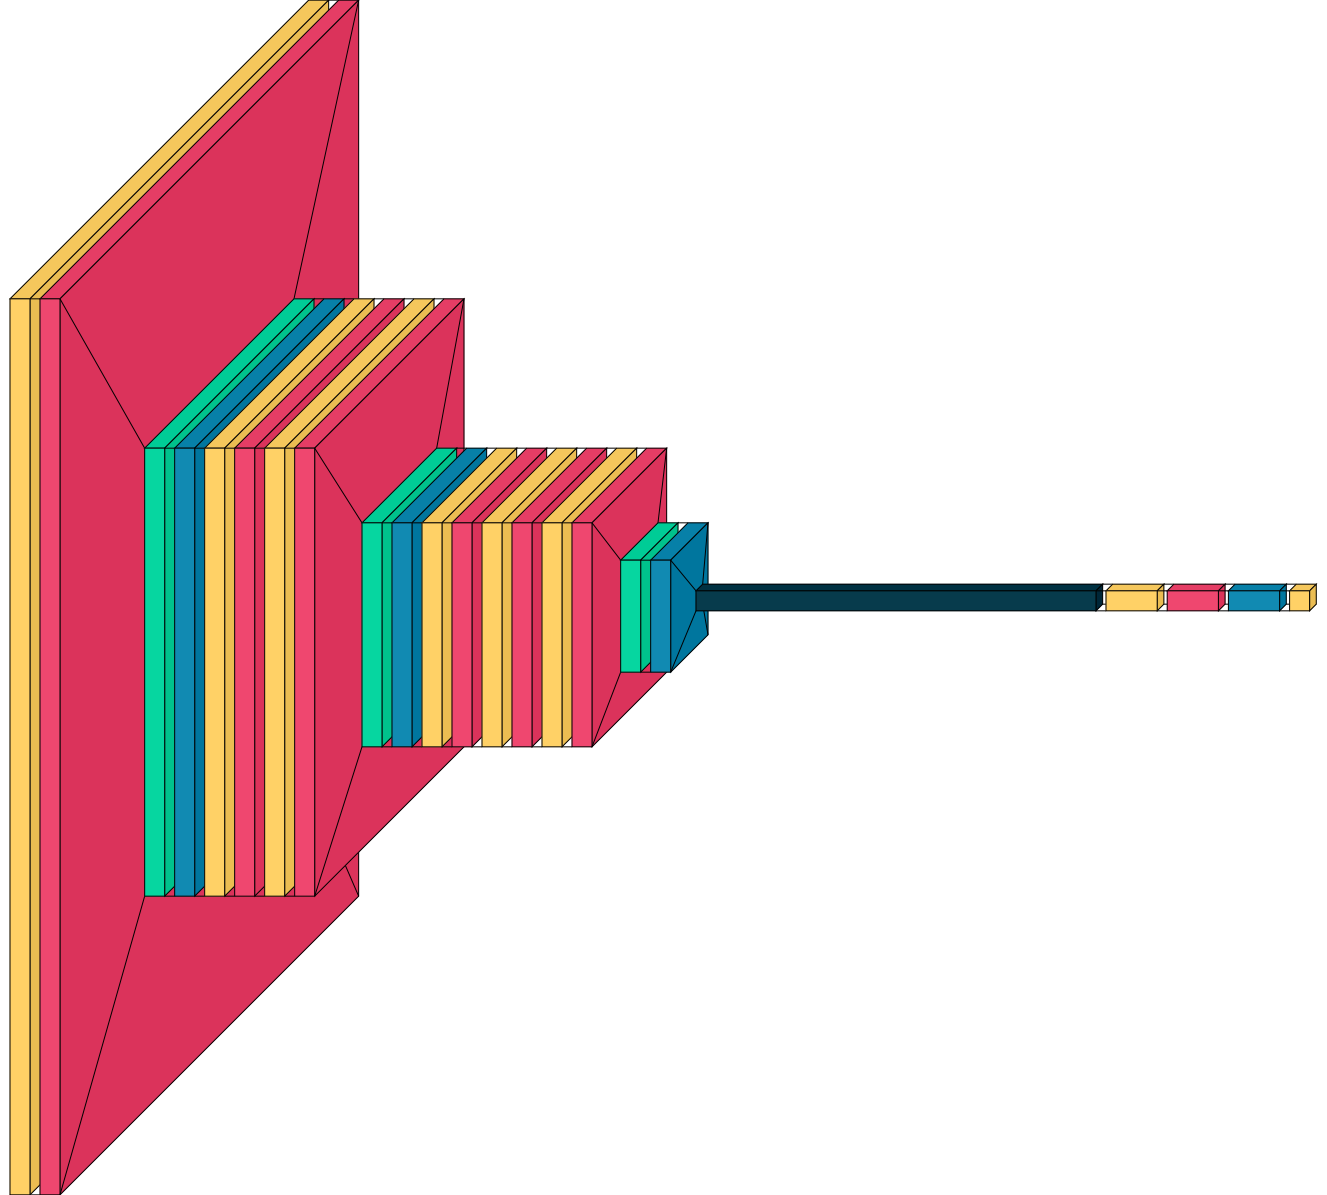

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/CovidDataset.zip

Archive:  /content/gdrive/MyDrive/CovidDataset.zip
   creating: cov/Train/
   creating: cov/Train/covid/
  inflating: cov/Train/covid/001.jpeg  
  inflating: cov/Train/covid/002.jpeg  
  inflating: cov/Train/covid/003.jpeg  
  inflating: cov/Train/covid/004.jpeg  
  inflating: cov/Train/covid/005.jpeg  
  inflating: cov/Train/covid/006.jpeg  
  inflating: cov/Train/covid/007.jpg  
  inflating: cov/Train/covid/008.jpg  
  inflating: cov/Train/covid/009.jpg  
  inflating: cov/Train/covid/010.jpeg  
  inflating: cov/Train/covid/011.jpeg  
  inflating: cov/Train/covid/012.jpeg  
  inflating: cov/Train/covid/013.jpeg  
  inflating: cov/Train/covid/014.jpeg  
  inflating: cov/Train/covid/015.jpeg  
  inflating: cov/Train/covid/016.jpeg  
  inflating: cov/Train/covid/017.jpeg  
  inflating: cov/Train/covid/018.jpeg  
  inflating: cov/Train/covid/019.jpeg  
  inflating: cov/Train/covid/01E392EE-69F9-4E33-BFCE-E5C968654078-768x572.jpeg  
  inflating: cov/Train/covid/020.jpg  
  inflating: cov/T

In [ ]:
training_data_dir ="/content/cov/Train" 
validation_data_dir = "/content/cov/Val"

In [ ]:
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from livelossplot import PlotLossesKeras

from keras import layers
from keras.preprocessing import image
from keras.models import Model

In [ ]:
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE

BATCH_SIZE =32


In [ ]:
with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode="categorical")

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False)

Found 3963 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
checkpoint_filepath = "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

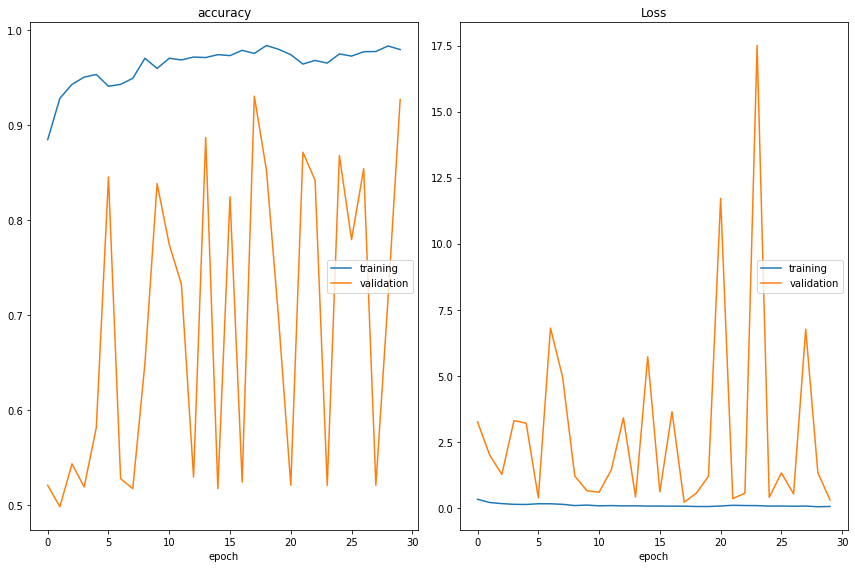

accuracy
	training         	 (min:    0.885, max:    0.984, cur:    0.980)
	validation       	 (min:    0.498, max:    0.931, cur:    0.927)
Loss
	training         	 (min:    0.044, max:    0.325, cur:    0.054)
	validation       	 (min:    0.212, max:   17.502, cur:    0.301)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Training
H = model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[model_checkpoint_callback,PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")],
    verbose=1)

#model.save_weights(MODEL_FILE)

In [ ]:
model=keras.models.load_model("/content/weights-improvement-18-0.93.h5")

Found 600 images belonging to 2 classes.
Confusion Matrix


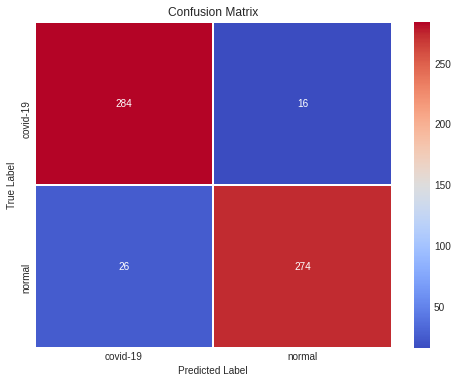

[[284  16]
 [ 26 274]]
Classification Report
              precision    recall  f1-score   support

    covid-19       0.92      0.95      0.93       300
      normal       0.94      0.91      0.93       300

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



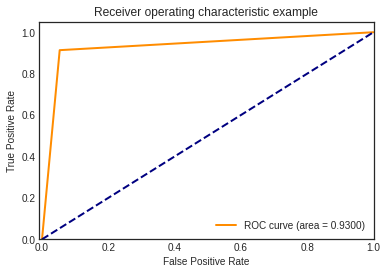

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

LABELS = ["covid-19","normal"]

def show_confusion_matrix(validations, predictions):
    matrix = confusion_matrix(validations,predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
    shuffle=False)    

filenames = validation_generator.filenames
nb_samples = len(filenames)

Y_pred = model.predict_generator(validation_generator,(nb_samples//BATCH_SIZE))
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
show_confusion_matrix(validation_generator.classes, y_pred)

print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = ["covid-19","normal"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
   fpr[i], tpr[i], _ = roc_curve(validation_generator.classes, y_pred)
   roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
       lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.evaluate_generator(training_generator)

[0.10210853815078735, 0.9581125378608704]

In [ ]:
model.evaluate_generator(validation_generator)

[0.2144930064678192, 0.9300000071525574]